In [1]:
import csv
import math
import random
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def scalarVectorProduct(scalar, vector):
    """
    This function multiplies a scalar with a vector.

    Parameters
    ----------
    scalar : float
        Scalar.
    vector : list
        List of numbers.
    """

    output = []
    for i in range(len(vector)):
        output.append(scalar * vector[i])

    return output

In [3]:
def addTwoVectors(vector1, vector2):
    """
    This function adds two vectors.

    Parameters
    ----------
    vector1 : list
        List of numbers.
    vector2 : list
        List of numbers.
    """

    output = []
    for i in range(len(vector1)):
        output.append(vector1[i] + vector2[i])

    return output

In [4]:
def transpose(matrix):
    """
    Transpose a matrix

    Parameters
    ----------
    matrix : list
        A list of lists representing a matrix
    """

    transpose_matrix = []
    for i in range(len(matrix[0])):
        row = []
        for j in range(len(matrix)):
            row.append(matrix[j][i])
        transpose_matrix.append(row)
    
    return transpose_matrix

In [5]:
def matrixVectorProduct(matrix, vector):
    """
    This function multiplies a matrix and a vector.

    Parameters
    ----------
    matrix : list
        A list of lists representing a matrix.
    vector : list
        A list representing a vector.
    """

    if len(matrix[0]) != len(vector):
        raise Exception("Invalid matrix dimensions")
    
    output = []
    for i in range(len(matrix)):
        summation = 0
        for j in range(len(vector)):
            summation += matrix[i][j] * vector[j]
        output.append(summation)
    
    return output

In [6]:
def matrixMultiplication(matrix1, matrix2):
    """
    Multiply two matrices

    Parameters
    ----------
    matrix1 : list
        A list of lists representing a matrix
    matrix2 : list
        A list of lists representing a matrix
    """

    shape1 = (len(matrix1), len(matrix1[0])) # shape1 = K x M1
    shape2 = (len(matrix2), len(matrix2[0])) # shape2 = M2 x N

    if shape1[1] != shape2[0]:               # if M1 != M2
        raise Exception("Invalid matrix dimensions")
    
    result = []
    for i in range(shape1[0]):              # iterate through rows of matrix1
        row = []                         
        for j in range(shape2[1]):          # iterate through columns of matrix2
            summation = 0
            for k in range(shape2[0]):      # calculate the inner product between row of matrix1 and column of matrix2
                summation += matrix1[i][k] * matrix2[k][j]
            row.append(summation)
        result.append(row)
    
    return result

In [7]:
def initialiseIdentity(size):
    """
    This function creates an identity matrix.

    Parameters
    ----------
    size : int
        Size of the identity matrix.
    """

    output = [[0 for i in range(size)] for j in range(size)]
    for i in range(size):
        output[i][i] = 1

    return output

In [8]:
def matrixInverse(matrix):
    """
    Invert a matrix

    Parameters
    ----------
    matrix : list
        A list of lists representing a matrix
    """

    if len(matrix) != len(matrix[0]):
        raise Exception("Invalid matrix dimensions")
    
    inverse = initialiseIdentity(len(matrix))

    for k in range(len(matrix)):
        if matrix[k][k] == 0: # find a row with non-zero entry in column k to swap with
            for i in range(k+1, len(matrix)):
                if matrix[i][k] != 0:
                    matrix[k], matrix[i] = matrix[i], matrix[k]
                    inverse[k], inverse[i] = inverse[i], inverse[k]
                    break
            else:
                raise Exception("Matrix is not invertible")
        
        factor = 1/matrix[k][k]
        matrix[k] = scalarVectorProduct(factor, matrix[k])
        inverse[k] = scalarVectorProduct(factor, inverse[k])

        # divide row k by matrix[k][k] to make matrix[k][k] equal to 1
        for i in range(len(matrix)):
            if i == k:
                continue
            factor = matrix[i][k]
            matrix[i] = addTwoVectors(matrix[i], scalarVectorProduct(-factor, matrix[k]))    # R_i = R_i - factor*R_(row_num)
            inverse[i] = addTwoVectors(inverse[i], scalarVectorProduct(-factor, inverse[k])) # Performing same operations on L_inv

    return inverse

## Main Code

In [9]:
class PolynomialRegression(object):
    """
    Polynomial Regression Class
    """
    def __init__(self, degree=2):
        """
        Constructor function

        Parameters
        ----------
        degree : int
            Degree of the polynomial
        """

        self.X = []
        self.y = []
        self.degree = degree
        self.coefficients = [0]*(degree+1)
    
    def __str__(self):
        """
        String representation of the polynomial

        Returns
        -------
        str
            String representation of the polynomial
        """

        output = ""
        for i in range(len(self.coefficients)):
            if i == 0:
                output += str(round(self.coefficients[i]))
            else:
                output += " + " + str(round(self.coefficients[i])) + "x^" + str(i)
        
        return output
    
    def fit(self, x, y):
        """
        Fits the polynomial regression model

        Parameters
        ----------
        X : list
            List of input data
        y : list
            List of output data
        """

        self.X = self.createVandermondeMatrix(x)
        self.y = y
        self.normalEquation()

    def createVandermondeMatrix(self, x):
        """
        Creates a Vandermonde matrix https://en.wikipedia.org/wiki/Vandermonde_matrix

        Parameters
        ----------
        x : list
            List of input data
        """
        
        X = []
        for i in range(len(x)):
            row = []
            for j in range(self.degree + 1):
                row.append(x[i] ** j)
            X.append(row)
        
        return X

    def normalEquation(self):
        """
        Solve a linear system Ax = b using the normal equation
        """

        tranpose_X = transpose(self.X)                    # X^T
        self.X = matrixMultiplication(tranpose_X, self.X) # X <- X^T * X
        self.X = matrixInverse(self.X)                    # X <- X^-1
        self.X = matrixMultiplication(self.X, tranpose_X) # X <- X^-1 * X^T
        self.coefficients = matrixVectorProduct(self.X, self.y) # X <- X^-1 * X^T * y
    
    def plotPolynomial(self, xrange, delta=0.1):
        """
        Plot the predicted polynomial

        Parameters
        ----------
        range : tuple
            Range of the plot
        delta : float
            Step size for the plot
        """

        x, y = [], []
        t = xrange[0]
        while t <= xrange[1]:
            x.append(t)
            y.append(self.predict(t))
            t += delta

        return x, y
    
    def predict(self, x):
        """
        Predict the output of the polynomial

        Parameters
        ----------
        x : float
            Input data
        """

        output = 0
        cache = 1
        for i in range(len(self.coefficients)):
            output += self.coefficients[i] * cache
            cache *= x

        return output

In [10]:
def loadCsv(filename):
    """
    Load a CSV file

    Parameters
    ----------
    filename : str
        Name of the file
    """
    
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    X, y = [], []
    for i in range(1, len(dataset)):
        X.append(float(dataset[i][0]))
        y.append(float(dataset[i][1]))
        
    return (X, y)

In [11]:
dataset = loadCsv('Data.csv')

In [12]:
model = PolynomialRegression(3) 
model.fit(dataset[0], dataset[1])
print(model)

1 + 1x^1 + 2x^2 + 3x^3


In [13]:
model = PolynomialRegression(4) 
model.fit(dataset[0], dataset[1])
print(model)

1 + 1x^1 + 2x^2 + 3x^3 + 0x^4


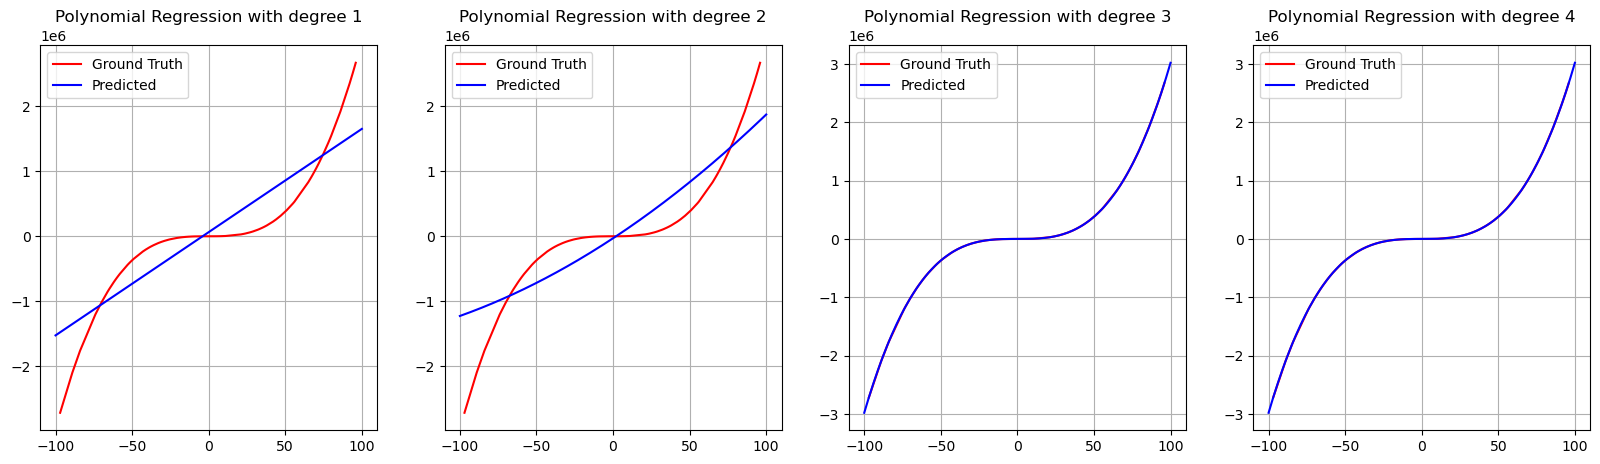

In [14]:
degrees = [1,2,3,4]
plt.figure(figsize=(20,5))

for i, degree in enumerate(degrees):
    plt.subplot(1, 4, i + 1) 

    model = PolynomialRegression(degree) 
    model.fit(dataset[0], dataset[1])

    x, y = model.plotPolynomial((-100, 100), 1) # plot the polynomial in the range (-100, 100) with step size 1

    plt.plot(dataset[0], dataset[1], c='r', label="Ground Truth")
    plt.plot(x, y, c='b', label="Predicted")
    plt.title(f"Polynomial Regression with degree {degree}")
    plt.grid(True)
    plt.legend()

plt.show()